In [1]:
#Import libs

import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from minisom import MiniSom

from pylab import pcolor, colorbar, plot

In [2]:
#Import dataset

df = pd.read_csv('wines.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3    Ash                          178 non-null    float64
 4    Alcalinity of ash            178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [5]:
# Defining features and targets
features_names = df.columns[1:14]
targets_names = df.columns[0]

In [6]:
X = df[features_names].to_numpy()
y = df[targets_names].to_numpy()

In [7]:
normalizer = MinMaxScaler(feature_range=(0,1))

X = normalizer.fit_transform(X)

In [8]:
#MiniSom (x-> n_rows, y-> n_cols, input_len-> n_features, sigma-> radius, learning_rate, random_seed)
#Advisable Size = 5*sqrt(df.shape[0])

som = MiniSom(x=8, y=8, input_len=len(features_names), sigma=1.0, learning_rate=0.5, random_seed=42)

In [9]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

In [10]:
#som._weights
#som._activation_map

In [11]:
q = som.activation_response(X)
q

array([[17.,  2.,  6.,  5.,  6.,  5.,  0.,  3.],
       [12.,  5.,  1.,  6.,  5.,  2.,  2.,  3.],
       [20.,  0.,  1.,  6.,  4.,  1.,  3.,  3.],
       [ 1.,  2.,  3.,  0.,  0.,  2.,  2.,  3.],
       [ 0.,  0.,  0.,  2.,  5.,  6.,  3.,  0.],
       [ 2.,  0.,  1.,  1.,  2.,  0.,  0.,  4.],
       [ 0.,  3.,  0.,  0.,  4.,  1.,  1.,  1.],
       [ 1.,  1.,  0.,  4.,  0.,  1.,  1.,  3.]])

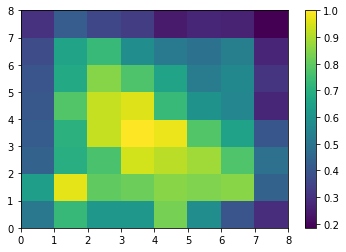

In [12]:
#MID - Mean Inter Neuron Distance
#Higher value -> more different from the neighbors
pcolor(som.distance_map().T)
colorbar()

In [13]:
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']

In [14]:
# y[y==1] = 0
# y[y==2] = 1
# y[y==3] = 2
y = y-1
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

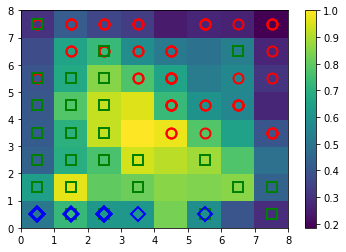

In [17]:
pcolor(som.distance_map().T)
colorbar()

for i, x in enumerate(X):
    w = som.winner(x) #Coordinates of the BMU for each row
    plot(w[0]+0.5, w[1]+0.5, markers[y[i]], markerfacecolor='None', markersize=10, 
         markeredgecolor=colors[y[i]], markeredgewidth=2)